<a href="https://colab.research.google.com/github/darkraithromb/next-platform-starter/blob/main/complexity_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import subprocess
import os
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [13]:
def constant(n, a):
    return a

def logarithmic(n, a, b):
    return a * np.log(n) + b

def linear(n, a, b):
    return a * n + b

def linearithmic(n, a, b):
    return a * n * np.log(n) + b

def quadratic(n, a, b):
    return a * n**2 + b


Execution output for input size 10:

Before sorting array elements are - 
13 18 27 2 19 25 
After sorting array elements are - 
2 13 18 19 25 27 

Execution output for input size 100:

Before sorting array elements are - 
13 18 27 2 19 25 
After sorting array elements are - 
2 13 18 19 25 27 

Execution output for input size 1000:

Before sorting array elements are - 
13 18 27 2 19 25 
After sorting array elements are - 
2 13 18 19 25 27 

Execution output for input size 10000:

Before sorting array elements are - 
13 18 27 2 19 25 
After sorting array elements are - 
2 13 18 19 25 27 

Execution output for input size 50000:

Before sorting array elements are - 
13 18 27 2 19 25 
After sorting array elements are - 
2 13 18 19 25 27 

An error occurred: x and y must have same first dimension, but have shapes (5,) and (1,)
The best-fit time complexity is: None


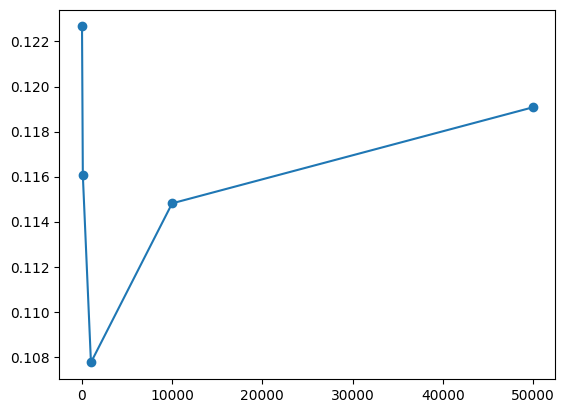

In [15]:
import numpy as np
import subprocess
import os
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def run_java_with_input_sizes(java_file_path, input_sizes):
    # Get the directory and the file name without the extension
    directory, filename = os.path.split(java_file_path)
    classname = filename.split('.')[0]

    times = []

    try:
        # Change the current directory to where the Java file is located
        os.chdir(directory)

        # Compile the Java file
        compile_result = subprocess.run(['javac', filename], capture_output=True, text=True)

        if compile_result.returncode != 0:
            print(f"Compilation failed:\n{compile_result.stderr}")
            return

        for n in input_sizes:
            start_time = time.time()

            # Run the compiled Java class with input size n
            run_result = subprocess.run(['java', classname, str(n)], capture_output=True, text=True)

            end_time = time.time()
            execution_time = end_time - start_time
            times.append(execution_time)

            if run_result.returncode != 0:
                print(f"Execution failed for input size {n}:\n{run_result.stderr}")
            else:
                print(f"Execution output for input size {n}:\n{run_result.stdout}")

        # Convert input sizes and times to numpy arrays
        input_sizes_np = np.array(input_sizes)
        times_np = np.array(times)

        # Fit different complexity models
        popt_const, _ = curve_fit(constant, input_sizes_np, times_np)
        popt_log, _ = curve_fit(logarithmic, input_sizes_np, times_np)
        popt_lin, _ = curve_fit(linear, input_sizes_np, times_np)
        popt_linlog, _ = curve_fit(linearithmic, input_sizes_np, times_np)
        popt_quad, _ = curve_fit(quadratic, input_sizes_np, times_np)

        # Calculate residuals for each model
        residuals_const = np.sum((times_np - constant(input_sizes_np, *popt_const))**2)
        residuals_log = np.sum((times_np - logarithmic(input_sizes_np, *popt_log))**2)
        residuals_lin = np.sum((times_np - linear(input_sizes_np, *popt_lin))**2)
        residuals_linlog = np.sum((times_np - linearithmic(input_sizes_np, *popt_linlog))**2)
        residuals_quad = np.sum((times_np - quadratic(input_sizes_np, *popt_quad))**2)

        # Determine the best fit
        residuals = {
            'O(1)': residuals_const,
            'O(log n)': residuals_log,
            'O(n)': residuals_lin,
            'O(n log n)': residuals_linlog,
            'O(n^2)': residuals_quad
        }
        best_fit = min(residuals, key=residuals.get)

        # Plotting the results
        plt.plot(input_sizes, times, marker='o', label='Observed')
        plt.plot(input_sizes, constant(input_sizes_np, *popt_const), label='O(1)', linestyle='dashed')
        plt.plot(input_sizes, logarithmic(input_sizes_np, *popt_log), label='O(log n)', linestyle='dashed')
        plt.plot(input_sizes, linear(input_sizes_np, *popt_lin), label='O(n)', linestyle='dashed')
        plt.plot(input_sizes, linearithmic(input_sizes_np, *popt_linlog), label='O(n log n)', linestyle='dashed')
        plt.plot(input_sizes, quadratic(input_sizes_np, *popt_quad), label='O(n^2)', linestyle='dashed')

        plt.title(f'Execution Time vs Input Size (Best fit: {best_fit})')
        plt.xlabel('Input Size (n)')
        plt.ylabel('Execution Time (seconds)')
        plt.legend()
        plt.grid(True)
        plt.show()

        return best_fit

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
java_file = '/content/Quick.java'
input_sizes = [10, 100, 1000, 10000, 50000]  # Different input sizes
best_complexity = run_java_with_input_sizes(java_file, input_sizes)
print(f"The best-fit time complexity is: {best_complexity}")
